# Final Project MPC
## Houses Price prediction

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [5]:
# Load data
houses = pd.read_csv('houses.csv', index_col=0)
houses_competition = pd.read_csv('houses_competition.csv', index_col=0)
houses_competition.insert(0, 'Fake price', np.nan) # to have same indexes for predictions
houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6681,3.500,3,2.25,1860,8378,2.0,0.0,0.0,3,7,1860,0,1995,0.0,98038,47.3875,-122.032,1870,8378
17798,5.925,4,3.00,2170,8240,1.0,0.0,0.0,4,8,1370,800,1968,0.0,98052,47.6291,-122.093,2020,7944
18854,2.555,2,1.00,1440,43560,1.0,0.0,0.0,4,7,1150,290,1965,0.0,98027,47.4916,-122.082,1870,56628
13478,13.300,4,2.25,3260,4640,2.0,0.0,0.0,5,9,2360,900,1907,0.0,98112,47.6272,-122.312,3240,5800
10509,3.891,2,1.00,840,5400,1.0,0.0,0.0,4,7,840,0,1948,0.0,98118,47.5489,-122.271,1340,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16125,2.900,2,1.00,930,7740,1.0,0.0,0.0,3,6,930,0,1924,0.0,98125,47.7091,-122.292,1250,7740
19004,3.150,3,2.50,1730,6368,2.0,0.0,0.0,3,7,1730,0,1993,0.0,98038,47.3505,-122.032,1780,6597
9094,6.850,3,2.50,3450,8000,3.0,0.0,0.0,4,8,2970,480,1927,1975.0,98116,47.5605,-122.402,1880,6135
3537,3.260,6,1.50,1930,8400,1.0,0.0,0.0,3,7,1030,900,1971,0.0,98146,47.4869,-122.340,1780,9520


## Descriptive analysis

In [3]:
row, col = houses.shape
print("{} individuals described by {} variables".format(row, col))

13397 individuals described by 19 variables


In [4]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,13397.000000,13397.000000,13397.000000,13397.000000,1.339700e+04,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,5.411905,3.379861,2.122509,2085.261775,1.525303e+04,1.495185,0.006867,0.225648,3.412406,7.662312,1792.022542,293.030604,1971.132642,83.006494,98077.574756,47.559242,-122.213414,1987.884750,12774.004180
std,3.727862,0.938934,0.764619,919.172404,3.973164e+04,0.539493,0.082587,0.752068,0.652101,1.168484,827.231993,443.115894,29.360525,398.562717,53.391212,0.138897,0.140730,680.418605,25855.329281
min,0.820000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.220000,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.469300,-122.328000,1490.000000,5100.000000
50%,4.500000,3.000000,2.250000,1920.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1564.000000,0.000000,1975.000000,0.000000,98065.000000,47.571500,-122.229000,1840.000000,7620.000000
75%,6.440000,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677500,-122.123000,2360.000000,10091.000000
max,77.000000,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,434728.000000


We can notice from the description above that :
- 'waterfront', 'view', 'sqft_basement', 'yr_renovated': have more than half of their values nulls
- 'waterfront' is mostly null
- 'lat', 'long': have almost constants values

### Correlation matrix

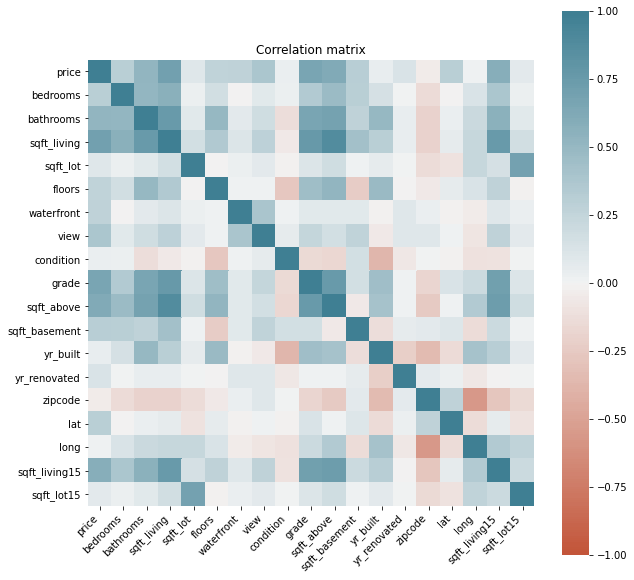

In [5]:
# Plot correlation matrix of variables
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(houses.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation matrix")
clear_output()


From the matrix we read that the price is well correlated with the following variables :
- sqft_living
- grade
- sqft_above
- sqft_living15

On the other hand we can see that there are strong correlation between those variables taken in pairs.

There are also strong correlation between: 
- long & zipcode


### Information quantity in the model

In [6]:
# Information in the model
Y = houses.iloc[:, 0]
y_mean = np.mean(Y)
It = np.sum((Y - y_mean)**2)
print("It = {}".format(It))

It = 186163.56522629363


## Utilities functions

### Build model and generalization error

In [61]:
# Utilities functions for models
def build_regression(data, idx_p, idx_t):
    X = data.iloc[:, idx_p] 
    X = sm.add_constant(X)
    Y = data.iloc[:, idx_t]
    model = sm.OLS(Y, X).fit()
    return model


def make_prediction(sm_model, data):
    pred_cols = sm_model.model.exog_names[1:] # take predictive cols
    X = data.loc[:, pred_cols]
    X = sm.add_constant(X)
    return pd.Series(sm_model.predict(X))


def generalization_error_split(train, test, idx_p, idx_t):
    """Mean Squared Error"""
    model = build_regression(train, idx_p, idx_t)
    pred  = make_prediction(model, test)
    return np.mean((test.iloc[:, idx_t] - pred)**2)

### Variable Selection

In [62]:
def print_selection_info(train, test, vs):
    print("{} variables selected.".format(len(vs)))
    print("generalization error: ", generalization_error_split(train, test, vs, 0))

#### Forward & Backward: Stop strict, based on gen. error

In [63]:
# Selection based on generalization error utilities for forward and backward selection.

def step_selection(train, v_s, v_nu, idx_t, forward=True):    
    b_error = float('inf') # best value for gen error
    b_idx = -1 # best index to select (to add or remove depending on forward/backward.)

    train_2, valid = train_test_split(train, test_size=0.2, random_state=1)
    variables = v_nu if forward else v_s # variables to compare
    
    for idx in variables:
        error = (
            generalization_error_split(train_2, valid, np.append(v_s, idx), 0) 
            if forward else 
            generalization_error_split(train_2, valid, np.delete(v_s, np.where(v_s == idx)), 0)
        )
        if error < b_error:
            b_error = error
            b_idx = idx

    return b_idx, b_error


# Stop criteron strict: as soon as performance decrease
def forward_selection_strict(train, idx_p, idx_t):
    v_s = np.array([])
    v_nu = np.array(idx_p)
    Cf = float('inf')
    stop = False
    
    while stop is False and len(v_s) < len(idx_p):
        Xb, Cb = step_selection(train, v_s, v_nu, idx_t)
        if Cb < Cf: # lower is better performance for gen error
            v_s = np.append(v_s, Xb)
            v_nu = np.delete(v_nu, np.where(v_nu == Xb))
            Cf = Cb
        else:
            stop = True
    
    return v_s


# Stop criteron strict: as soon as performance decrease
def backward_selection_strict(train, idx_p, idx_t):
    v_s = np.array(idx_p)
    v_nu = np.array([]) # variables that will not be used/ we can remove it !
    Cf = float('inf')
    stop = False

    while stop is False and len(v_nu) < (len(idx_p)-1):
        Xb, Cb = step_selection(train, v_s, v_nu, idx_t, forward=False) # Xb is variable to remove
        if Cb < Cf: # lower error is better
            v_s = np.delete(v_s, np.where(v_s == Xb))
            v_nu = np.append(v_nu, Xb)
            Cf = Cb
        else:
            stop = True

    return v_s


#### Forward & Backward: No stop and keep the best, based on gen. error

In [64]:
# step selection code doesn't change


def forward_selection_nostop(train, idx_p, idx_t):
    v_s = np.array([])
    v_nu = np.array(idx_p)
    Cf = float('inf')
    v_f = np.array([]) # final variables selected 
    stop = False
    
    while not stop:
        Xb, Cb = step_selection(train, v_s, v_nu, idx_t)
        v_s = np.append(v_s, Xb)
        v_nu = np.delete(v_nu, np.where(v_nu == Xb))

        if Cb < Cf: # lower is better performance for gen error
            Cf = Cb
            v_f = v_s[:]

        stop = (len(v_s) == len(idx_p)) # all variables selected => end !
    
    return v_f


def backward_selection_nostop(train, idx_p, idx_t):
    v_s = np.array(idx_p)
    v_nu = np.array([]) # variables that will not be used/ we can remove it !
    Cf = float('inf')
    v_f = np.array(idx_p)
    stop = False

    while not stop:
        Xb, Cb = step_selection(train, v_s, v_nu, idx_t, forward=False) # Xb is variable to remove
        v_s = np.delete(v_s, np.where(v_s == Xb))
        v_nu = np.append(v_nu, Xb)

        if Cb < Cf: # lower error is better
            Cf = Cb
            v_f = v_s[:]

        stop = (len(v_s) == 1) # 1 variable used => end !

    return v_f

#### Forward selection based on p-value

In [65]:
# Selection based on critical probability utilities

def step_selection_pval(train, v_s, v_nu, idx_t, forward=True):
    b_idx = -1 # best index to select (to add or remove depending on forward/backward.)

    for idx in v_nu:
        model = build_regression(train, np.append(v_s, idx), 0)
        if all(p_value < 0.05 for p_value in model.pvalues[1:].values):
            b_idx = idx

    return b_idx


# We aim here at having the most variables possibles that are significant together 
def forward_selection_pval(train, idx_p, idx_t):
    v_s = np.array([])
    v_nu = np.array(idx_p)
    stop = False
    
    while stop is False and len(v_s) < len(idx_p):
        Xb = step_selection_pval(train, v_s, v_nu, idx_t)
        if Xb != -1:
            v_s = np.append(v_s, Xb)
            v_nu = np.delete(v_nu, np.where(v_nu == Xb))
        else:
            stop = True
    
    return v_s

### K-Fold generalization error

In [66]:
def k_fold_generalization_error(data, k, idx_p, idx_t):
    """
    Params
    ______
    k (int): k parameter for the KFold obj. Number of folds.
    idx_p (list): indexes of predictive variables.
    idx_t (int): index of target variable.
    """
    kf = KFold(n_splits=k)
    errors = [] # list of errors for each split

    for train_idx, test_idx in kf.split(data):
        train, test = data.iloc[train_idx], data.iloc[test_idx]
        errors.append(generalization_error_split(train, test, idx_p, idx_t))

    return np.mean(errors)

## Models

In [67]:
# Train/Test split
train, test = train_test_split(houses, test_size=0.2, random_state=20)
print(train.shape, test.shape)

(10717, 19) (2680, 19)


### Simple Linear Regression

Let us build models using each variable and compare models metrics (R^2, p-value, Ir)

#### Building model

In [15]:
for i in range(1, col):
    model = build_regression(train, [i], 0)
    print("{} ({})".format(houses.columns[i].upper(), i))
    print("R-squared: ", model.rsquared)
    print("p-value: ", model.pvalues[1:].values[0])
    print("Ir: ", np.sum(pd.Series(model.resid)**2))
    print("=====================================")
    print("\n")

BEDROOMS (1)
R-squared:  0.08695699471701646
p-value:  5.605855373585939e-214
Ir:  136519.25994464438


BATHROOMS (2)
R-squared:  0.27840841812347994
p-value:  0.0
Ir:  107893.21879700046


SQFT_LIVING (3)
R-squared:  0.49784789349539404
p-value:  0.0
Ir:  75082.37132642619


SQFT_LOT (4)
R-squared:  0.006601166337999564
p-value:  3.6404730528664265e-17
Ir:  148534.1575552364


FLOORS (5)
R-squared:  0.06650520408933058
p-value:  2.2358855477463756e-162
Ir:  139577.23564226128


WATERFRONT (6)
R-squared:  0.0823187242394553
p-value:  3.5516503316922097e-202
Ir:  137212.77958102064


VIEW (7)
R-squared:  0.15494961791431094
p-value:  0.0
Ir:  126352.92325855061


CONDITION (8)
R-squared:  0.001375041887803241
p-value:  0.000123202465888717
Ir:  149315.57380637812


GRADE (9)
R-squared:  0.43980039084060074
p-value:  0.0
Ir:  83761.7019365008


SQFT_ABOVE (10)
R-squared:  0.36833701970161514
p-value:  0.0
Ir:  94446.9889214441


SQFT_BASEMENT (11)
R-squared:  0.10815105459655106
p-value:

The predictive model based on the __sqft_living__ variable seems to be best, since his R-squared value is the greater one, the loss (Ir) is the smallest and the p-value of 0 indicates that, that variable influent significatively the price.

We can also think of the model based on __grade__ as its metrics are near the best's ones.

__Now let's compare their generalization errors__

In [16]:
for i in range(1, col):
    print("{} ({})".format(houses.columns[i].upper(), i))
    print("MSE: ", generalization_error_split(train, test, [i], 0))
    print("========================")
    print("\n")

BEDROOMS (1)
MSE:  12.149688274303205


BATHROOMS (2)
MSE:  9.972007450798092


SQFT_LIVING (3)
MSE:  6.96657303860466


SQFT_LOT (4)
MSE:  13.519870855242997


FLOORS (5)
MSE:  12.747661588509922


WATERFRONT (6)
MSE:  13.165793254939889


VIEW (7)
MSE:  11.85380675834853


CONDITION (8)
MSE:  13.675592242913295


GRADE (9)
MSE:  7.889645405681923


SQFT_ABOVE (10)
MSE:  8.193735513457217


SQFT_BASEMENT (11)
MSE:  12.888549661157752


YR_BUILT (12)
MSE:  13.643027831150436


YR_RENOVATED (13)
MSE:  13.446698912055792


ZIPCODE (14)
MSE:  13.64821687361795


LAT (15)
MSE:  12.412800759051313


LONG (16)
MSE:  13.668732767091987


SQFT_LIVING15 (17)
MSE:  9.419185287934665


SQFT_LOT15 (18)
MSE:  13.570819466689928




These results confirm that the __sqft_living__ variable is the best for predicting the price alone, although __grade__'s model performances are nearby.
<br><br>
The best model with single variable (simple regression) is the one based on __sqft_living__ <br>
Its generalization error is : 6.96657303860466

#### Competition prediction

In [68]:
model = build_regression(houses, [3], 0) # simple regression based on sqft_living
pred = make_prediction(model, houses_competition)
pred = pd.DataFrame({'ID': pred.index, 'Price': pred})
pred.to_csv('predictions/simple_regression.csv', index=False)

,ID,Price
15529,15529,5.568317
3233,3233,2.996609
14381,14381,4.396761
3201,3201,13.406311
3425,3425,4.911103
...,...,...
7989,7989,6.111233
9973,9973,4.796804
9007,9007,3.853845
16345,16345,10.911754


#### Results

| Model                | Gen. Error | Kaggle Error |
|----------------------|------------|--------------|
| SLR with sqft_living | 6.96657    | 6.33249      |

### Multiple Linear Regression


Let us use the 18 variables to predict the price

In [13]:
generalization_error_split(train, test, range(1, col), 0)

4.447198500076972

Using all variables is better at predicting new values.

#### Competition prediction

In [98]:
model = build_regression(houses, range(1, col), 0) # multiple regression based on the 18 variables
pred = make_prediction(model, houses_competition)
pred = pd.DataFrame({'ID': pred.index, 'Price': pred})
pred.to_csv('predictions/multiple_linear_regression_all.csv', index=False)

#### Results

| Model                 | Gen. Error | Kaggle Error |
|-----------------------|:----------:|:------------:|
| SLR with sqft_living  |   6.96657  |    6.33249   |
| MLR with 18 variables |   4.44719  |    3.54670   |

Can we reach better performances with less but specific variables ?

#### Variable Selection

In [14]:
# Variable selection based on generalization error with strict stop criterion.
forward_strict_vs = forward_selection_strict(train, range(1, col), 0)
backward_strict_vs = backward_selection_strict(train, range(1, col), 0)

print("Forward selection strict")
print_selection_info(train, test, forward_strict_vs)
print("\n")

print("Backward selection strict")
print_selection_info(train, test, backward_strict_vs)

Forward selection strict
15 variables selected.
generalization error:  4.440422615849088


Backward selection strict
15 variables selected.
generalization error:  4.440422615848943


In [32]:
print(set(forward_strict_vs) == set(backward_strict_vs))

True


__Conclusion:__

Using strict stop criterion for forward and backward variables leads to the same selection of 15 variables.
The generalization error is : 4.440422

Let's now use a less strict criterion: we won't stop until the end and keep the best model.

In [15]:
forward_nostop_vs = forward_selection_nostop(train, range(1, col), 0)
print_selection_info(train, test, forward_nostop_vs)

15 variables selected.
generalization error:  4.440422615849088


In [101]:
backward_nostop_vs = backward_selection_nostop(train, range(1, col), 0)
print_selection_info(train, test, backward_nostop_vs)

15 variables selected.
generalization error:  4.440422615848943


In [36]:
print((set(forward_nostop_vs) == set(backward_nostop_vs)) and (set(forward_nostop_vs) == set(forward_strict_vs)))

True


A less strict stop criterion leads to same results that seems to have better performance than using all variables.

#### Competition prediction

In [103]:
model = build_regression(houses, forward_nostop_vs, 0) # multiple regression based on the 15 variables selected by forward or backward selection based on gen. error
pred = make_prediction(model, houses_competition)
pred = pd.DataFrame({'ID': pred.index, 'Price': pred})
pred.to_csv('predictions/mlr_selection_generr.csv', index=False)

#### Results

| Model                              | Gen. Error | Kaggle Error |
|------------------------------------|:----------:|:------------:|
| SLR with sqft_living               |   6.96657  |    6.33249   |
| MLR with 18 variables              |   4.44719  |    3.54670   |
| MLR with 15 variables (gen. error) |   4.44042  |    3.55712   |

We can notice here that although this last model seemed to be better at predicting new values, its Kaggle score is a bit worst than the previous' one.

__Let us now use another performance criteria: critical probability p-value__

In [104]:
forward_pvalue_vs = forward_selection_pval(train, range(1, col), 0)
print_selection_info(train, test, forward_pvalue_vs)

9 variables selected.
generalization error:  5.8034881529512585


### K-Fold Cross Validation 

In [105]:
print("Backward gen. error: ", k_fold_generalization_error(houses, 10, forward_nostop_vs, 0))
print("Forward p-value: ", k_fold_generalization_error(houses, 10, forward_pvalue_vs, 0))

Backward gen. error:  4.24183773654894
Forward p-value:  5.78666570187348


__Conclusion variable selection with linear models__

We can conclude that the best model to predict the price is the one built with the forward (or backward) selection with no stop criterion and generalization error as performance criterion. But the model based on all variables has really close performances.

In [16]:
best_vs = forward_nostop_vs

# Corresponding variables are
print(best_vs)
[houses.columns[int(i)] for i in best_vs]

[ 3. 15.  6.  9. 12.  7.  2.  1.  8. 14. 16. 10. 17. 13.  5.]


['sqft_living',
 'lat',
 'waterfront',
 'grade',
 'yr_built',
 'view',
 'bathrooms',
 'bedrooms',
 'condition',
 'zipcode',
 'long',
 'sqft_above',
 'sqft_living15',
 'yr_renovated',
 'floors']

### Multiple Nonlinear Regression 

Let us now try to improve the previous model by trying some additional non-linear computed variables. 

In [70]:
def add_polynomial_feature(data, idx_p, power):
    new_data = data.copy(deep = True)
    for i in range(0, len(idx_p)):
        for j in power:
            for k in range(2, j+1):
                new_data['{}_pow_{}'.format(new_data.columns[idx_p[i]],k)] = new_data.iloc[:,idx_p[i]]**k
    return(new_data)

In [108]:
# Let's add powers of variable 3: sqft_living, up to power 9.
train_poly = add_polynomial_feature(train, [3], range(2, 10))
test_poly = add_polynomial_feature(test, [3], range(2, 10))
train_poly

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,sqft_living_pow_2,sqft_living_pow_3,sqft_living_pow_4,sqft_living_pow_5,sqft_living_pow_6,sqft_living_pow_7,sqft_living_pow_8,sqft_living_pow_9
14833,8.25000,5,1.75,2330,6000,1.5,0.0,0.0,3,8,...,2150,6000,5428900,12649337000,29472955210000,68671985639300000,-6014970123816964544,4645107525731840640,-5138236312318107392,-153703863691224576
14069,2.55500,4,1.00,1370,41194,1.5,0.0,2.0,5,5,...,1590,84070,1876900,2571353000,3522753610000,4826172445700000,6611856250609000000,891723142940156544,4175596963184058624,2077176712199313920
14855,2.49950,3,2.00,1550,15040,1.0,0.0,0.0,4,6,...,1510,41416,2402500,3723875000,5772006250000,8946609687500000,-4579499058084551616,3772928347122367360,421066673741545728,7017301719561571840
5691,6.60000,4,2.50,2510,4543,2.0,0.0,0.0,3,8,...,2550,4675,6300100,15813251000,39691260010000,99625062625100000,-8195509842932722624,-2610063574983734400,-2665427042282520320,5946222627441233408
2015,5.80000,3,3.25,1490,857,3.0,0.0,0.0,3,8,...,1550,1092,2220100,3307949000,4928844010000,7343977574900000,-7504217487108551616,-2557147123753628544,8326808864970653952,-7713552800253849088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,3.02059,4,2.00,1390,745,3.0,0.0,0.0,3,7,...,1390,942,1932100,2685619000,3733010410000,5188884469900000,7212549413161000000,8861652269503472512,-4728386628153687808,-5416522893025677824
10571,2.66200,3,1.50,1430,9600,1.0,0.0,0.0,4,7,...,1590,10240,2044900,2924207000,4181616010000,5979710894300000,8550986578849000000,-2280513115362721408,3939946077899022592,7865948914189063680
11483,4.55000,2,1.50,1020,1146,3.0,0.0,0.0,3,7,...,1138,1156,1040400,1061208000,1082432160000,1104080803200000,1126162419264000000,4987535079287799808,-4015583470280441856,-717955322530234368
21039,4.71275,4,2.50,3361,5038,2.0,0.0,0.0,3,9,...,2316,4105,11296321,37966934881,127606868135041,428886683801872801,2642106508749458113,7236076452634390497,7644268154997430529,-3929225731041393119


In [109]:
# Generalization error of the whole variables
generalization_error_split(train_poly, test_poly, range(1, train_poly.shape[1]), 0)

6.150649515669444

Let us now compare generalization error of each power with best selected variables above

In [110]:
for i in range(train.shape[1], train.shape[1]+8): # 8 new variables
    print("variable {} ({}) added error :".format(train_poly.columns[i], i))
    print(generalization_error_split(train_poly, test_poly, np.append(best_vs, i), 0))
    print("\n")

variable sqft_living_pow_2 (19) added error :
3.801949267442133


variable sqft_living_pow_3 (20) added error :
3.9306097588101854


variable sqft_living_pow_4 (21) added error :
4.876323394654974


variable sqft_living_pow_5 (22) added error :
7.163853080589357


variable sqft_living_pow_6 (23) added error :
13.665143872152465


variable sqft_living_pow_7 (24) added error :
13.654795822417421


variable sqft_living_pow_8 (25) added error :
13.668189609892197


variable sqft_living_pow_9 (26) added error :
13.650204292208063




Adding __sqft_living_pow_2__ to the list of __best selected variables__ seems to lead to better performance for our model. The generalization error is reduced to: 3.80194

In [111]:
# Let us try all variables with sqft_living_pow_2
generalization_error_split(train_poly, test_poly, range(1, train.shape[1]+1), 0)

3.8160946915733285

Errors are still nearby each other.

#### Competition prediction

In [112]:
houses_poly = add_polynomial_feature(houses, [3], [2])
houses_competition_poly = add_polynomial_feature(houses_competition, [3], [2])

best_vs = np.append(best_vs, houses_poly.shape[1]-1) # add last variable (sqft_living^2)

model = build_regression(houses_poly, best_vs, 0) # multiple regression based on the 15 best selected vars and sqft_living^2
pred = make_prediction(model, houses_competition_poly)
pred = pd.DataFrame({'ID': pred.index, 'Price': pred})
pred.to_csv('predictions/mnonlr_best_and_sqft_living_squared.csv', index=False)

#### Results

| Model                                | Gen. Error | Kaggle Error |
|--------------------------------------|:----------:|:------------:|
| SLR with sqft_living                 |   6.96657  |    6.33249   |
| MLR with 18 variables                |   4.44719  |    3.54670   |
| MLR with 15 variables (gen. error)   |   4.44042  |    3.55712   |
| MNonL with 15 best and sqft_living^2 |   3.80194  |    3.06725   |

### Variable Selection
Let us now add all variables squared to the dataset and use variable selection algorithm.

In [58]:
train_poly = add_polynomial_feature(train, range(1, train.shape[1]), [2])
test_poly = add_polynomial_feature(test, range(1, train.shape[1]), [2])
train_poly

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,grade_pow_2,sqft_above_pow_2,sqft_basement_pow_2,yr_built_pow_2,yr_renovated_pow_2,zipcode_pow_2,lat_pow_2,long_pow_2,sqft_living15_pow_2,sqft_lot15_pow_2
14833,8.25000,5,1.75,2330,6000,1.5,0.0,0.0,3,8,...,64,4326400,62500,3751969,0.0,9643043601,2270.150845,14979.801664,4622500,36000000
14069,2.55500,4,1.00,1370,41194,1.5,0.0,2.0,5,5,...,25,1876900,0,3610000,0.0,9622040464,2234.604167,14919.156736,2528100,7067764900
14855,2.49950,3,2.00,1550,15040,1.0,0.0,0.0,4,6,...,36,2402500,0,3833764,0.0,9615567481,2255.043661,14908.165801,2280100,1715285056
5691,6.60000,4,2.50,2510,4543,2.0,0.0,0.0,3,8,...,64,6300100,0,4008004,0.0,9618705625,2265.398254,14893.517521,6502500,21855625
2015,5.80000,3,3.25,1490,857,3.0,0.0,0.0,3,8,...,64,1488400,72900,4004001,0.0,9624002404,2269.159914,14963.160976,2402500,1192464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,3.02059,4,2.00,1390,745,3.0,0.0,0.0,3,7,...,49,1932100,0,4032064,0.0,9609292729,2259.985044,14890.344676,1932100,887364
10571,2.66200,3,1.50,1430,9600,1.0,0.0,0.0,4,7,...,49,2044900,0,3865156,0.0,9615567481,2253.752192,14920.622500,2528100,104857600
11483,4.55000,2,1.50,1020,1146,3.0,0.0,0.0,3,7,...,49,1040400,0,4004001,0.0,9626553225,2273.134471,14963.405625,1295044,1336336
21039,4.71275,4,2.50,3361,5038,2.0,0.0,0.0,3,9,...,81,11296321,0,4056196,0.0,9622040464,2239.835464,14924.287225,5363856,16851025


In [59]:
generalization_error_split(train_poly, test_poly, range(1, train_poly.shape[1]), 0)

3.5707431648087073

In [60]:
forward_poly_vs = forward_selection_nostop(train_poly, range(1, train_poly.shape[1]), 0) # forward selection without stop
print_selection_info(train_poly, test_poly, forward_poly_vs)

30 variables selected.
generalization error:  3.5743374296005133


In [61]:
backward_poly_vs = backward_selection_nostop(train_poly, range(1, train_poly.shape[1]), 0)
print_selection_info(train_poly, test_poly, backward_poly_vs)

29 variables selected.
generalization error:  3.580739592106952


In [62]:
forward_poly_pval_vs = forward_selection_pval(train_poly, range(1, train_poly.shape[1]), 0)
print_selection_info(train_poly, test_poly, forward_poly_pval_vs)

24 variables selected.
generalization error:  3.576108591070458


### K-Fold cross validation

In [63]:
houses_poly = add_polynomial_feature(train, range(1, train.shape[1]), [2])

print("Forward gen. error: ", k_fold_generalization_error(houses_poly, 10, forward_poly_vs, 0))
print("Backward gen. error: ", k_fold_generalization_error(houses_poly, 10, backward_poly_vs, 0))
print("Forward p-value: ", k_fold_generalization_error(houses_poly, 10, forward_poly_pval_vs, 0))

Forward gen. error:  3.815792503365736
Backward gen. error:  3.815451816439898
Forward p-value:  3.725071638249534


__Conclusion:__
Adding power 2 of variables leads to a selection of 24 variables in forward with p-value criterion that outperforms others models with a lowest K-Fold generalization error but variables selected by forward selection based on generalization error was better.
We can try both on Kaggle.

#### Competition prediction

In [157]:
houses_poly = add_polynomial_feature(houses, range(1, houses.shape[1]), [2])
houses_competition_poly = add_polynomial_feature(houses_competition, range(1, houses_competition.shape[1]), [2])

best_vs = forward_poly_vs # switch this to forward_poly_pval_vs

model = build_regression(houses_poly, best_vs, 0)
pred = make_prediction(model, houses_competition_poly)
pred = pd.DataFrame({'ID': pred.index, 'Price': pred})
pred.to_csv('predictions/submit1.csv', index=False)

#### Results

| Model                               | Gen. Error | Kaggle Error |
|-------------------------------------|:----------:|:------------:|
| SLR with sqft_living                |   6.96657  |    6.33249   |
| MLR with 18 variables               |   4.44719  |    3.54670   |
| MLR with 15 variables (gen. error)  |   4.44042  |    3.55712   |
| MNLR with 15 best and sqft_living^2 |   3.80194  |    3.06725   |
| MNLR with power 2 forward p-value   |   3.57610  |    3.24439   |
| MNLR with power 2 forward           |   3.57433  |    2.89440   |

__Let's try same thing with power 2 and 3 of variables added now.__

In [64]:
train_poly = add_polynomial_feature(train, range(1, train.shape[1]), [2, 3])
test_poly = add_polynomial_feature(test, range(1, train.shape[1]), [2, 3])
train_poly

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_pow_2,zipcode_pow_3,lat_pow_2,lat_pow_3,long_pow_2,long_pow_3,sqft_living15_pow_2,sqft_living15_pow_3,sqft_lot15_pow_2,sqft_lot15_pow_3
14833,8.25000,5,1.75,2330,6000,1.5,0.0,0.0,3,8,...,9643043601,946937238574599,2270.150845,108163.834186,14979.801664,-1.833408e+06,4622500,9938375000,36000000,216000000000
14069,2.55500,4,1.00,1370,41194,1.5,0.0,2.0,5,5,...,9622040464,943845193194688,2234.604167,105633.314320,14919.156736,-1.822285e+06,2528100,4019679000,7067764900,594186995143000
14855,2.49950,3,2.00,1550,15040,1.0,0.0,0.0,4,6,...,9615567481,942892931619379,2255.043661,107085.934857,14908.165801,-1.820272e+06,2280100,3442951000,1715285056,71040245879296
5691,6.60000,4,2.50,2510,4543,2.0,0.0,0.0,3,8,...,9618705625,943354554171875,2265.398254,107824.348398,14893.517521,-1.817590e+06,6502500,16581375000,21855625,102175046875
2015,5.80000,3,3.25,1490,857,3.0,0.0,0.0,3,8,...,9624002404,944133883837208,2269.159914,108093.020939,14963.160976,-1.830354e+06,2402500,3723875000,1192464,1302170688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,3.02059,4,2.00,1390,745,3.0,0.0,0.0,3,7,...,9609292729,941970138345683,2259.985044,107438.107026,14890.344676,-1.817009e+06,1932100,2685619000,887364,835896888
10571,2.66200,3,1.50,1430,9600,1.0,0.0,0.0,4,7,...,9615567481,942892931619379,2253.752192,106993.955423,14920.622500,-1.822554e+06,2528100,4019679000,104857600,1073741824000
11483,4.55000,2,1.50,1020,1146,3.0,0.0,0.0,3,7,...,9626553225,944509269670875,2273.134471,108377.141416,14963.405625,-1.830399e+06,1295044,1473760072,1336336,1544804416
21039,4.71275,4,2.50,3361,5038,2.0,0.0,0.0,3,9,...,9622040464,943845193194688,2239.835464,106004.469003,14924.287225,-1.823226e+06,5363856,12422690496,16851025,69173457625


In [31]:
forward_poly2_vs = forward_selection_nostop(train_poly, range(1, train_poly.shape[1]), 0) # forward selection without stop
print_selection_info(train_poly, test_poly, forward_poly2_vs)

33 variables selected.
generalization error:  3.201789496096117


In [127]:
backward_poly2_vs = backward_selection_nostop(train_poly, range(1, train_poly.shape[1]), 0)
print_selection_info(train_poly, test_poly, backward_poly2_vs)

26 variables selected.
generalization error:  3.8341550292193136


In [70]:
forward_poly2_pval_vs = forward_selection_pval(train_poly, range(1, train_poly.shape[1]), 0)
print_selection_info(train_poly, test_poly, forward_poly2_pval_vs)

39 variables selected.
generalization error:  5.027808141234724


In [66]:
forward_poly3_vs = forward_selection_strict(train_poly, range(1, train_poly.shape[1]), 0) # forward selection with strict stop
print_selection_info(train_poly, test_poly, forward_poly3_vs)

27 variables selected.
generalization error:  3.200141928809219


In [168]:
backward_poly3_vs = backward_selection_strict(train_poly, range(1, train_poly.shape[1]), 0) # forward selection with strict stop
print_selection_info(train_poly, test_poly, backward_poly3_vs)

41 variables selected.
generalization error:  3.776902626139534


#### K-Fold Cross Validation

In [169]:
houses_poly = add_polynomial_feature(train, range(1, train.shape[1]), [2, 3])

print("Forward gen. error: ", k_fold_generalization_error(houses_poly, 10, forward_poly2_vs, 0))
print("Backward gen. error: ", k_fold_generalization_error(houses_poly, 10, backward_poly2_vs, 0))
print("Forward p-value: ", k_fold_generalization_error(houses_poly, 10, forward_poly2_pval_vs, 0))
print("Forward gen. error strict: ", k_fold_generalization_error(houses_poly, 10, forward_poly3_vs, 0))
print("Backward gen. error strict: ", k_fold_generalization_error(houses_poly, 10, backward_poly3_vs, 0))


Forward gen. error:  5.3193158209034035
Backward gen. error:  6.40952476969304
Forward p-value:  6.339742383436884
Forward gen. error strict:  4.712380903314042
Backward gen. error strict:  5.630730855574193


__Conclusion:__
We notice that forward selection with strict and no stop criterion based on generalization error seem to give better performances at predicting new values.
We can try both on Kaggle.

#### Competition prediction

In [130]:
houses_poly = add_polynomial_feature(houses, range(1, houses.shape[1]), [2, 3])
houses_competition_poly = add_polynomial_feature(houses_competition, range(1, houses_competition.shape[1]), [2, 3])

best_vs = forward_poly3_vs

model = build_regression(houses_poly, best_vs, 0)
pred = make_prediction(model, houses_competition_poly)
pred = pd.DataFrame({'ID': pred.index, 'Price': pred})
pred.to_csv('predictions/submit3.csv', index=False)

The model based on forward variable selection with power 2 and 3 seems to be better than the previous. Let us compare the generalization errors on the whole dataset.

#### Results

| Model                               | Gen. Error | Kaggle Error |
|-------------------------------------|:----------:|:------------:|
| SLR with sqft_living                |   6.96657  |    6.33249   |
| MLR with 18 variables               |   4.44719  |    3.54670   |
| MLR with 15 variables (gen. error)  |   4.44042  |    3.55712   |
| MNLR with 15 best and sqft_living^2 |   3.80194  |    3.06725   |
| MNLR with power 2 forward p-value   |   3.57610  |    3.24439   |
| MNLR with power 2 forward           |   3.57433  |    2.89440   |
| MNLR with power 2,3 forward         |   3.20178  |    2.57199   |
| MNLR with power 2,3 forward strict  |   3.20014  |    2.57134   |

__Same thing with more powers (2-5) !__

In [81]:
train_poly = add_polynomial_feature(train, range(1, train.shape[1]), range(2, 6))
test_poly = add_polynomial_feature(test, range(1, train.shape[1]), range(2, 6))
train_poly.shape

(10717, 91)

In [82]:
# forward selection with strict stop
forward_poly4_vs = forward_selection_strict(train_poly, range(1, train_poly.shape[1]), 0)
print_selection_info(train_poly, test_poly, forward_poly4_vs) 

41 variables selected.
generalization error:  3.1887291288297486


In [37]:
# forward selection with strict stop
forward_poly4_nostop_vs = forward_selection_nostop(train_poly, range(1, train_poly.shape[1]), 0)
print_selection_info(train_poly, test_poly, forward_poly4_nostop_vs) 

57 variables selected.
generalization error:  3.2758235153116964


In [140]:
# backward selection with strict stop
backward_poly4_vs = backward_selection_strict(train_poly, range(1, train_poly.shape[1]), 0)
print_selection_info(train_poly, test_poly, backward_poly4_vs) 

81 variables selected.
generalization error:  17.214366255680165


__Conclusion__ <br>

Computing starts to be really long with these 90 variables !
Applying forward selection strict based on generalization error seem to give a better model, it's not the case with the backward selection which selection is worst than choosing any single variable. 

Let us try that forward selection model predictions on Kaggle as well.

#### Competition prediction

In [78]:
houses_poly = add_polynomial_feature(houses, range(1, houses.shape[1]), range(2, 6))
houses_competition_poly = add_polynomial_feature(houses_competition, range(1, houses_competition.shape[1]), range(2, 6))

best_vs = forward_poly4_vs

model = build_regression(houses_poly, best_vs, 0)
pred = make_prediction(model, houses_competition_poly)
pred = pd.DataFrame({'ID': pred.index, 'Price': pred})
pred.to_csv('predictions/submit6.csv', index=False)

#### Results

| Model                               | Gen. Error | Kaggle Error |
|-------------------------------------|:----------:|:------------:|
| SLR with sqft_living                |   6.96657  |    6.33249   |
| MLR with 18 variables               |   4.44719  |    3.54670   |
| MLR with 15 variables (gen. error)  |   4.44042  |    3.55712   |
| MNLR with 15 best and sqft_living^2 |   3.80194  |    3.06725   |
| MNLR with power 2 forward p-value   |   3.57610  |    3.24439   |
| MNLR with power 2 forward           |   3.57433  |    2.89440   |
| MNLR with power 2,3 forward         |   3.20178  |    2.57199   |
| MNLR with power 2,3 forward strict  |   3.20014  |  __2.57134__ |
| MNLR with power 2-5 forward strict  |   3.18872  |    2.59864   |

__Based on our previous performances, Let's added even more powers (2 to 10) and apply forward selection strict__

In [19]:
train_poly = add_polynomial_feature(train, range(1, train.shape[1]), range(2, 11))
test_poly = add_polynomial_feature(test, range(1, train.shape[1]), range(2, 11))
train_poly.shape

(10717, 181)

In [20]:
# forward selection with strict stop
forward_poly5_vs = forward_selection_strict(train_poly, range(1, train_poly.shape[1]), 0)
print_selection_info(train_poly, test_poly, forward_poly5_vs) 

38 variables selected.
generalization error:  3.181578290982501


Its seems to lead to better performances even though computation took long time. Let us predict houses competition prices with this model but keep training not on the whole dataset but just on the train_poly dataset.

#### Competition prediction

In [21]:
houses_poly = add_polynomial_feature(houses, range(1, houses.shape[1]), range(2, 11))
houses_competition_poly = add_polynomial_feature(houses_competition, range(1, houses_competition.shape[1]), range(2, 11))

best_vs = forward_poly5_vs

model = build_regression(train_poly, best_vs, 0) # use train_poly dataset instead of houses_poly
pred = make_prediction(model, houses_competition_poly)
pred = pd.DataFrame({'ID': pred.index, 'Price': pred})
pred.to_csv('predictions/submit7.csv', index=False)

#### Results

| Model                               | Gen. Error | Kaggle Error |
|-------------------------------------|:----------:|:------------:|
| SLR with sqft_living                |   6.96657  |    6.33249   |
| MLR with 18 variables               |   4.44719  |    3.54670   |
| MLR with 15 variables (gen. error)  |   4.44042  |    3.55712   |
| MNLR with 15 best and sqft_living^2 |   3.80194  |    3.06725   |
| MNLR with power 2 forward p-value   |   3.57610  |    3.24439   |
| MNLR with power 2 forward           |   3.57433  |    2.89440   |
| MNLR with power 2,3 forward         |   3.20178  |    2.57199   |
| MNLR with power 2,3 forward strict  |   3.20014  |    2.57134   |
| MNLR with power 2-5 forward strict  |   3.18872  |    2.59864   |
| MNLR with power 2-10 forward strict |   3.18157  |  __2.48896__ |

In [22]:
# K-Fold error of this last model

# houses_poly = add_polynomial_feature(houses, range(1, houses.shape[1]), range(2, 11))
k_fold_generalization_error(houses_poly, 10, forward_poly5_vs, 0)

578515.7514052053

__Conclusion:__

The model based on forward variable selection for variables with power 2-10 has the lowest generalization error is the best at predicting new values.
His K-Fold generalization error is way worst and that can be explained by the fact that this model take more into account the latest values (not oldest ones).

Since the variable selection process starts to be slow, we can stop here and choose the best selection so far:

Forward variable selection with variables at powers 2 to 10 based on generalization error with a stop criterion.
The errors of the Multiple Nonlinear Regression model based on that selection is in the table above, with a Kaggle error of __2.48896__

In [24]:
forward_poly5_vs = [int(i) for i in forward_poly5_vs] # convert to int

print(forward_poly5_vs) # print for easy reusability

[37, 15, 93, 6, 12, 7, 28, 149, 14, 156, 8, 128, 17, 119, 127, 1, 109, 100, 10, 154, 118, 148, 150, 147, 25, 19, 21, 101, 22, 46, 3, 11, 5, 157, 155, 4, 146, 83]


In [26]:
# Model choosed !

train_poly = add_polynomial_feature(train, range(1, train.shape[1]), range(2, 11))
test_poly = add_polynomial_feature(test, range(1, train.shape[1]), range(2, 11))

best_vs = [37, 15, 93, 6, 12, 7, 28, 149, 14, 156, 8, 128, 17, 119, 127, 1, 109, 100, 10, 154, 118, 148, 150, 147, 25, 19, 21, 101, 22, 46, 3, 11, 5, 157, 155, 4, 146, 83] # forward power 2-10 strict stop

model = build_regression(train_poly, best_vs, 0) # use this model !

generalization_error_split(train_poly, test_poly, best_vs, 0)

3.181578290982501

## To go further...

We got interested in machine learning algorithms that can improve our model.

In [113]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.feature_selection import SelectFromModel

In [114]:
X = houses.iloc[:,1:]
Y = houses.iloc[:,0]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 1. XGBoost

In [131]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=20, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# MSE
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

clear_output()
mse

1.504279097985352

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

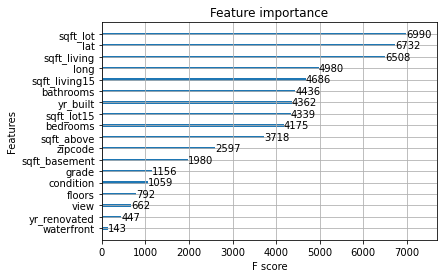

In [132]:
xgb.plot_importance(xgb_model)

#### Feature Selection

In [133]:
thresholds = np.sort(xgb_model.feature_importances_)

for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=20)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	mse = mean_squared_error(y_test, y_pred)
	print("Thresh=%.8f, n=%d, MSE: %.2f" % (thresh, select_X_train.shape[1], mse))

/home/henri/anaconda3/envs/tfx-last/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
Thresh=0.00130305, n=18, MSE: 1.43
/home/henri/anaconda3/envs/tfx-last/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
Thresh=0.00201372, n=17, MSE: 1.53
/home/henri/anaconda3/envs/tfx-last/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
Thresh=0.00258396, n=16, MSE: 1.52
/home/henri/anaconda3/envs/tfx-last/lib/pyt

We can see that we have the best Mean Squared Error with 15 variables, let us select that model. (droping the 3 worst variables)

In [52]:
selection = SelectFromModel(xgb_model, threshold=thresholds[3], prefit=True)

select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

selection_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=20)
selection_model.fit(select_X_train, y_train)

y_pred = selection_model.predict(select_X_test)
mse = mean_squared_error(y_test, y_pred)
mse

/home/henri/anaconda3/envs/tfx-last/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


1.3062234219689275

#### Competition prediction

In [69]:
X_competition = houses_competition.iloc[:,1:]
Y_competition = houses_competition.iloc[:,0]

select_X_competition = selection.transform(X_competition)
pred = selection_model.predict(select_X_competition)

pred = pd.DataFrame({'ID': Y_competition.index, 'Price': pred})
pred.to_csv('predictions/submission.csv', index=False)

/home/henri/anaconda3/envs/tfx-last/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


#### Results

| Model                               | Gen. Error | Kaggle Error |
|-------------------------------------|:----------:|:------------:|
|  XGBoost with features selection    |   1.30622  |  __1.40666__ |

We can have better performances with some data pre-processing and hyperparamters tuning but those are way out of the scope of this course.